In [1]:
import sys 
sys.path.append('../')
import matplotlib.pyplot as plt
import torch
import numpy as np
from src.green_net import GreenNet1D, GreenNet2D
from src.ops import grid1d_coords
import scipy
from scipy import integrate
import h5py
from tqdm import tqdm
from functools import partial

In [2]:
def cosine_kernel(x,y,h):    
    return 2/h *np.sin(h/2) * np.cos(x-y)

In [3]:
def logarithm_kernel(x,y,h):
    a = x-y+h/2
    b = x-y-h/2
    k = (a*np.log(a.abs())-1) - (b*np.log(b.abs())-1)
    return k/h

In [4]:
def poisson_green(x,y,h):
    return ((x+y-np.abs(y-x))/2 - x*y)/h

In [5]:
def poisson_kernel(x, y, h):
    a = -x*(y-1) * (x<(y-h/2))
    b = -y*(x-1) * (x>(y+h/2))
    c = ( (1-x)*( -0.5*(y-h/2)**2 + x**2/2) + (x * (h/2+y-x))-( x * (0.5*(h/2+y)**2 - x**2/2)))/h * ( (x>=(y-h/2)) & (x<=(y+h/2)) )
    return a+b+c

In [32]:
data_path = '../dataset/f1d_513_3.00e-02.mat'

raw_data = scipy.io.loadmat(data_path)
F = raw_data['F']

In [19]:
# nh = 2**13+1
# h = np.pi/(nh-1)
# xh = torch.linspace(0,np.pi,nh)
# x_i = torch.cartesian_prod(xh, xh)
# K = cosine_kernel(x_i[:,0], x_i[:,1], h).reshape(nh,nh)
# U = h * K @ F

# f = np.sin(xh)**2
# u = h * K @ f.reshape(-1,1)
# u_gt = 4/3 * np.sin(xh)

# print((u.reshape(-1)-u_gt).abs().max())

In [33]:
nh = 2**9+1
h = 2/(nh-1)
xh = torch.linspace(-1,1,nh)
x_i = torch.cartesian_prod(xh, xh)
K = logarithm_kernel(x_i[:,0], x_i[:,1], h).reshape(nh,nh)
U = h * K @ F

# f = 1-xh**2
# u = h * K @ f.reshape(-1,1)
# u_gt = 4/3 * np.sin(xh)

# print((u.reshape(-1)-u_gt).abs().max())

In [34]:
raw_data = scipy.io.loadmat('../dataset/logarithm_513_3.00e-02.mat')
U_ = raw_data['U']

raw_data = scipy.io.loadmat('../dataset/f1d_513_3.00e-02.mat')
F_ = raw_data['F']

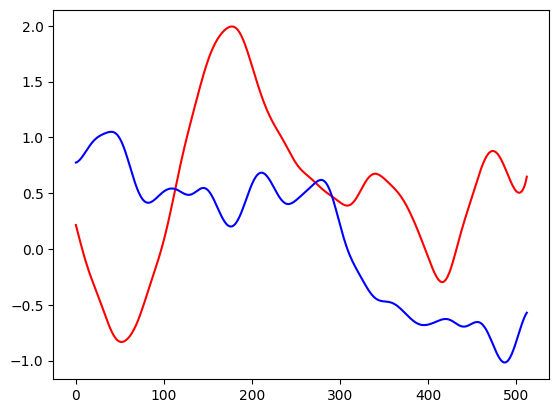

In [36]:
plt.plot(U[:,0], '-r')
plt.plot(U_[:,0], '-b')

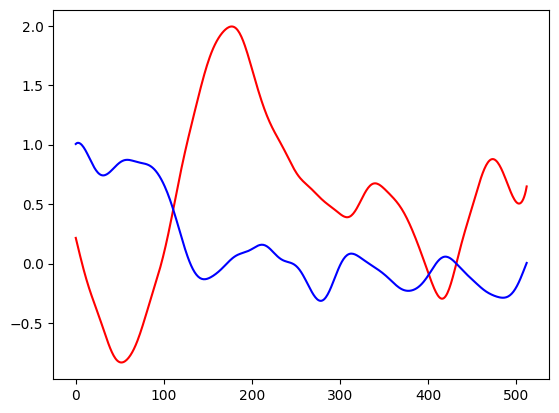

In [29]:
plt.plot(U[:,0], '-r')
plt.plot(U_[:,-1], '-b')